# Big Data Mart Sales Case Study :Project 7

Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.
Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales 
of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing 
the sales of their products.

The dataset includes two files:
- bigmartdata_Train.csv: Use this file for the model building purpose. 
- bigmartdata_Test.csv: Use this file for getting predictions from the trained model. 

    

In [1]:
#loading the required libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the Train dataset
df_train=pd.read_csv('bigmartdata_train.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In the above train dataset,there  are 8523 rows and 12 columns which includes the target label "Item_Outlet_Sales" column and
the remaining feature columns that helps in predicting the sales.

As sales is a continous value ,so we will consider this to be a Regression problem!

In [3]:
df_test=pd.read_csv('bigmartdata_test.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Tn the above test dataset,we can see there are 5681 rows and 11 columns ,as this is used for prediction of model so target column is not there.
therefore it consists of only the feature columns where the target label which is "Item_Outlet_Sales" to be predicted.
we can see first five rows and last 5 rows.

In [4]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Short Description of columns:

1.Item_Identifier :Unique product ID

2.Item_Weight:Weight of product

3.Item_Fat_Content:Whether the product is having low fat or not

4.Item_Visibility:The % of total display area of all products in a store allocated to the particular product

5.Item_Type:The category to which the product belongs

6.Item_MRP:Maximum Retail Price (list price) of the product 

7.Outlet_Identifier:Unique store ID

8.Outlet_Establishment_Year:The year in which store was established

9.Outlet_Size:The size of the store in terms of ground area covered

10.Outlet_Location_Type:the type of city in which the store is located

11.Outlet_Type:Whether the outlet is just a grocery store or some sort of supermarket

12.Item_Outlet_Sales:Sales of the product in the particulat store. This is the outcome variable to be predicted
   

In [5]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

Thus we can compare the rows and columns of both the dataset.  one columns is missing which is the target column in test data which we have to predict

# Checking Null values in training and testing dataset

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Thus we see that item_weight and outlet size has null values which has to be removed by imputation technique before going for modelling

In [7]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_Weight  and Outlet_Size has null values which needs to be treated before going to predictive phase

# Checking the datatypes of the test and train dataset

In [8]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Thus we see there are 7 categoricals cloumns in each test and train dataset,one integer datatype in each
dataset,4 float datatype in train dataset and 3 float datatype in test dataset. 

## EDA for train data test

In [10]:
df_train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We will impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.

In [11]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observation:
1.Item_weight has minimun weight of 4.5 and maximun weight of 21.35

2.Item_visibility has minimum value of 0 which cant be possisble.

3.Item_mrp :The minimum price of the product is Rs31 and maximun price is Rs266.

4.The year of establishment outlet vary from 1985 to 2009.

5.The minimum sales of the outlet is 33.29 and maximum sales is 13086.96. Average sale is around 2181

6.The lower ‘count’ of Item_Weight suggest there is missing value in the dataset.

7.High gap bw 75% and max in item_outlet_sales suggests that there is outlier present but as this is the target column so we wont do anything.

8high variance in outlet_sales.

# check the value counts for all the columns

In [12]:
#for imputation purpose ,lets first check in outlet_size and item_weight
print("Outlet_Size:\n", df_train.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", df_train.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64 




Outlet_Size is a categorical column, therefore we see frequency of medium is more with respect to others so 
we will impute it with most_frequent strategy which will take "medium" inputs for imputation. For item_weight,we will be imputing with mean value

In [13]:
#converting the outlet_establishment_year into outlet_years
#Years:As the big mart sales have collected 2013 sales data so used 2013 here
df_train['Outlet_Years'] = 2013 - df_train['Outlet_Establishment_Year']
df_train['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

This shows outlets are 4-28 years old.

# Splitting data into categorical column and numerical column

In [14]:
#list of all the non_object(numeric) columns
non_obj = df_train.select_dtypes('number').columns.to_list()
#list of all the object(categoric) columns
obj = df_train.select_dtypes('object').columns.to_list()

#numeric df
BM_nonobj =  df_train[non_obj]
#categoric df
BM_obj = df_train[obj]

In [15]:
non_obj #we can see numerical columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Outlet_Years']

In [16]:
obj #categorical columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
[df_train[category].value_counts() for category in obj[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT046    930
 OUT035    930
 OUT049    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    2793
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

1.for low fat values has been repeating so we can put them in one category as low fat using replace method.

2.Fruits and vegetables were found in more quantity in outlets.

3.The items types are either food,drink,non consumable .

4.Outlet_size in tier 3 is high compare to tier 2,tier1.

5.Outlets_location of Supermarket type 1 are more compare to other outlet_location.

In [18]:
df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [19]:
#thus now it has become two categories low fat and regular  
df_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
df_train["Item_Identifier"].value_counts() # we see Item_types are associated with IDs like FD-Food item,NC-Non-consumable,DR-Drink

FDG33    10
FDW13    10
FDD38     9
FDF56     9
FDU12     9
         ..
FDK57     1
FDN52     1
FDO33     1
FDT35     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [21]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


# Univariate Analysis for categorical columns

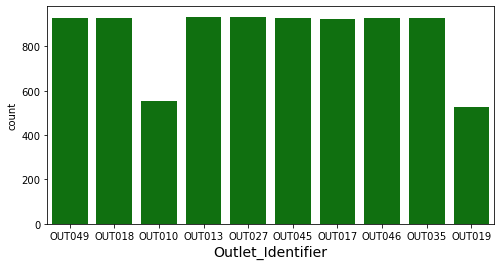

In [22]:
#for categoria
plt.figure(figsize=(8,4))
sns.countplot(x='Outlet_Identifier' , data=df_train,color='g')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

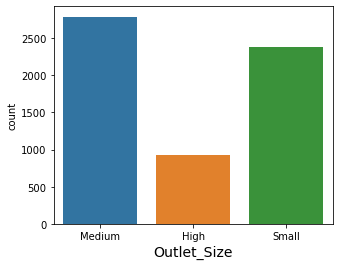

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Size' , data=df_train )
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

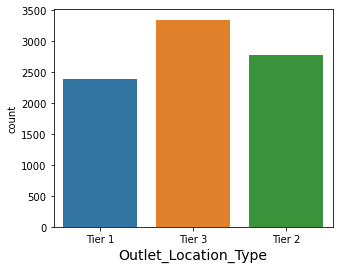

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Location_Type' , data=df_train )
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

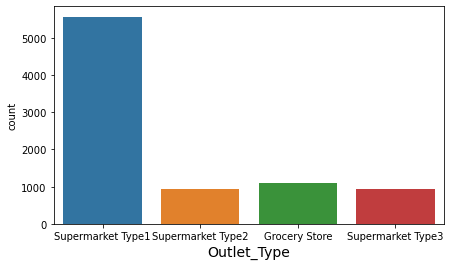

In [25]:
plt.figure(figsize=(7,4))
sns.countplot(x='Outlet_Type' , data=df_train )
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

 Categoric columns Observation:
1.Item_Fat_Content - Low fat products are mostly sold. 

2.Item_Type- Fruits and vegetables and snack foods are mostly popular and sold mostly.

3.Outlet_Identifier-Footl falls are evenly among outlets excluding OUT010 and OUT019 that are low due to lower foot falls.

4.Outlet_Size - Most of the outlets are medium sized.

5.Outlet_Location_Type-The most common type is Tier3 due to maximum foot fall.

6.Outlet_Type - The most popular outlet type is Supermarket Type1 as the sales margin is good. .

# Numerical Column Analysis

In [26]:
non_obj = df_train.select_dtypes('number').columns.to_list()

In [27]:
non_obj

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Outlet_Years']

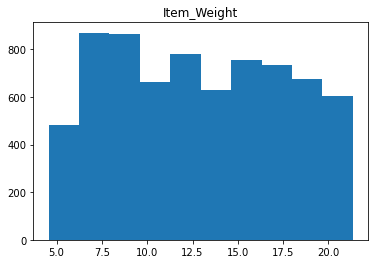

In [28]:
plt.hist(df_train['Item_Weight'])
plt.title("Item_Weight")
plt.show()   #somewhat normal distribution

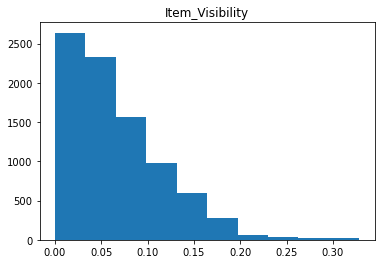

In [29]:
plt.hist(df_train['Item_Visibility'])
plt.title("Item_Visibility")
plt.show() #right skewed 

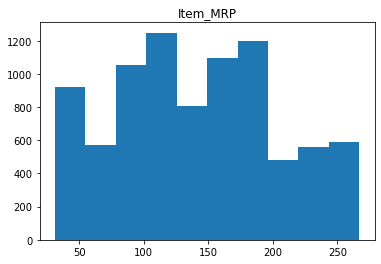

In [30]:
plt.hist(df_train['Item_MRP'])
plt.title("Item_MRP")
plt.show()

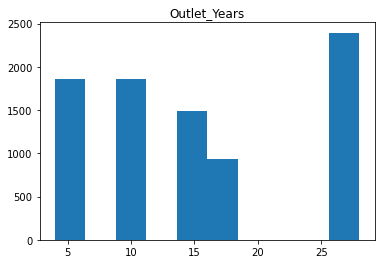

In [31]:
plt.hist(df_train['Outlet_Years'])
plt.title("Outlet_Years")
plt.show()

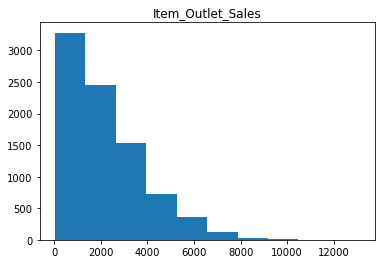

In [32]:
plt.hist(df_train['Item_Outlet_Sales'])
plt.title("Item_Outlet_Sales")
plt.show() #right skewed.

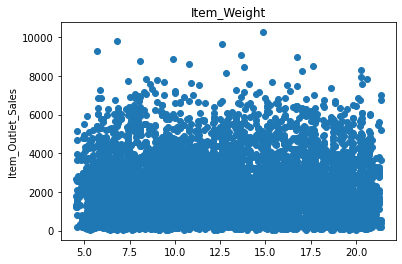

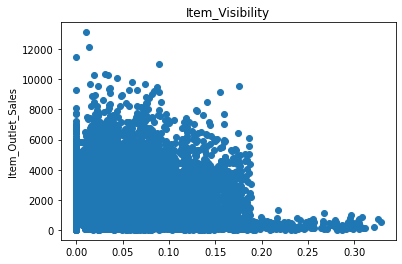

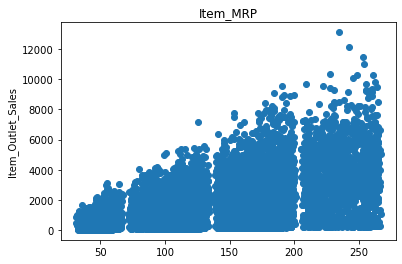

In [33]:
for numeric in BM_nonobj[non_obj[:3]]:
    plt.scatter(BM_nonobj[numeric], BM_nonobj['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

1.No relation bw weight of the item and sales

2.item outlet sales sharply decreases for the most visible items

3.s the mrp of an item increases item outlet sales also increases

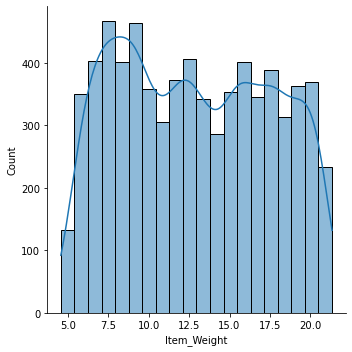

In [34]:
sns.displot(BM_nonobj['Item_Weight'],kde=True) #normal distribution

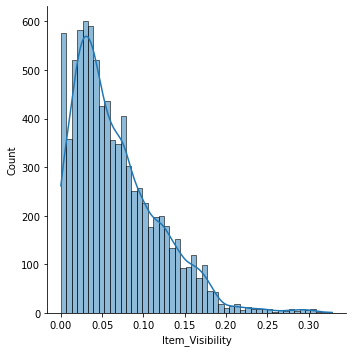

In [35]:
sns.displot(BM_nonobj['Item_Visibility'],kde=True) #right skewed

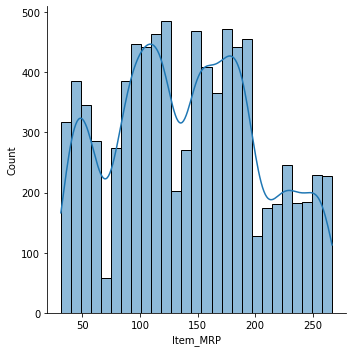

In [36]:
sns.displot(BM_nonobj['Item_MRP'],kde=True)

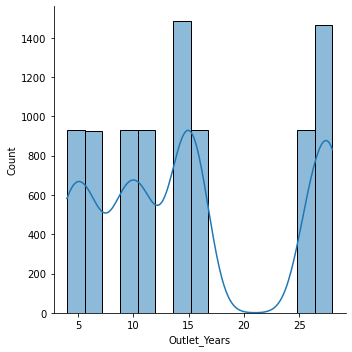

In [37]:
sns.displot(BM_nonobj['Outlet_Years'],kde=True)

Observation:
Outlet_Years - The most outlets are 35 years old,no specific pattern,no normal distribution.

Item_Weight - The data is very spreaded, no specific pattern,distribution is not normal

Item_Visibility - The data is spreaded ,right skewed ,distribution is not normal,item outlet sales sharply decreases for the most visible items

Item_MRP - Items with higher MRP are selling better in most cases.    
    

# Bivariate Plot/Multivariate plot 

Checking the features wrt to sales:

Sales per product type

Sales per outlet

Sales per outlet_type

Sales per outlet_size

Sales per location_type

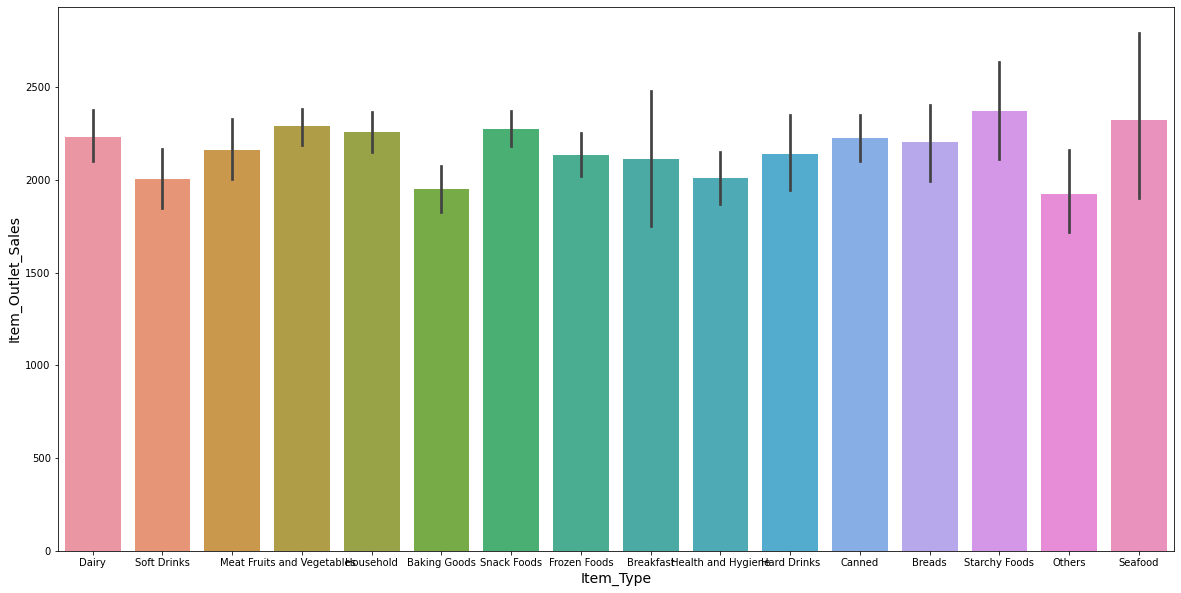

In [38]:
plt.figure(figsize=(20,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=df_train )
plt.xlabel('Item_Type', fontsize=14)
plt.ylabel('Item_Outlet_Sales',fontsize=14)
#plt.legend()
plt.show()

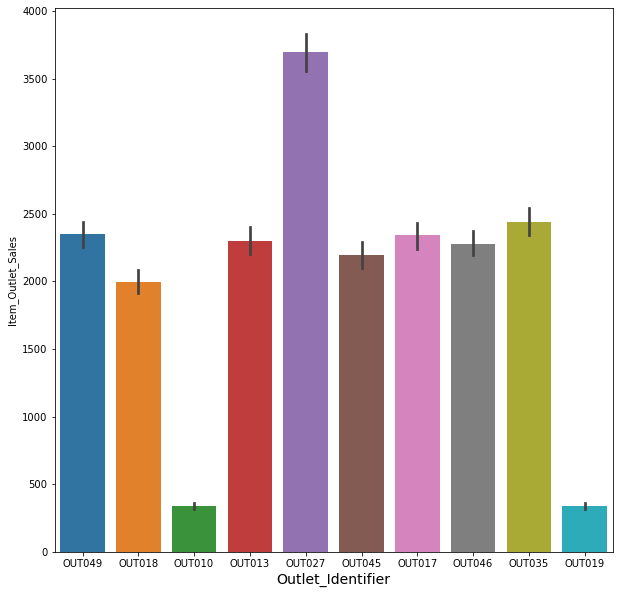

In [39]:
plt.figure(figsize=(10,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=df_train)
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.ylabel('Item_Outlet_Sales')
plt.show()

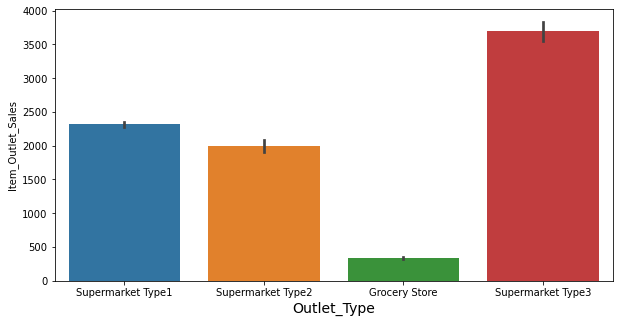

In [40]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=df_train )
plt.xlabel('Outlet_Type', fontsize=14)
plt.ylabel('Item_Outlet_Sales')
plt.show()

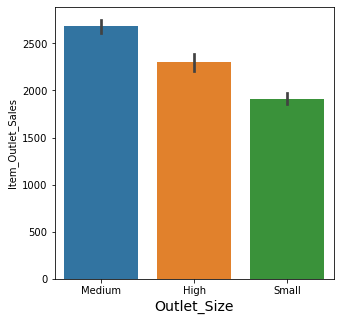

In [41]:
plt.figure(figsize=(5,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=df_train )
plt.xlabel('Outlet_Size', fontsize=14)
plt.ylabel('Item_Outlet_Sales')
plt.show()

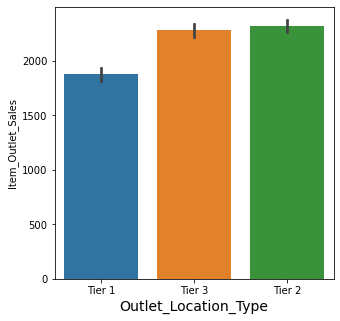

In [42]:
plt.figure(figsize=(5,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=df_train)
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.ylabel('Item_Outlet_Sales')
plt.show()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

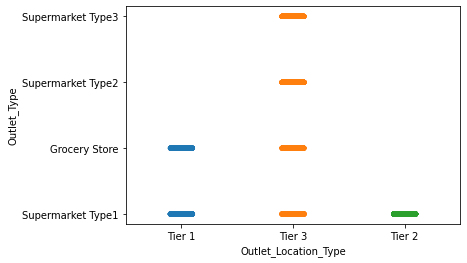

In [43]:
sns.stripplot(df_train['Outlet_Location_Type'],df_train['Outlet_Type'])

Tier 2 cities have only Superkarket type 1, Tier 1 cities have only supermarket 1 and grocery strores wheres Tier 3 got all the outlet types

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

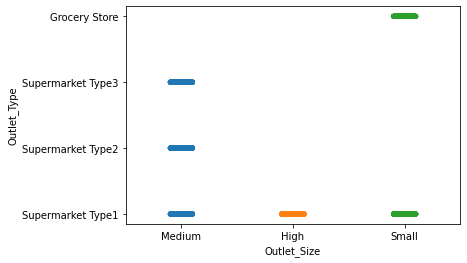

In [44]:
sns.stripplot(df_train['Outlet_Size'],df_train['Outlet_Type'])

Supermarket type 1 are of all sizes whereas grocery stores are only small
and Supermarket type 2, Supermarket type 3 are of medium size only.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

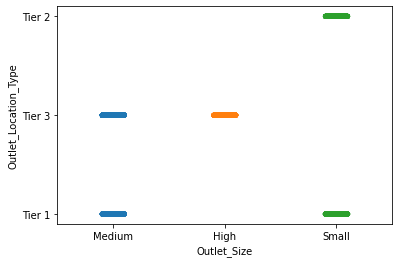

In [45]:
sns.stripplot(df_train['Outlet_Size'],df_train['Outlet_Location_Type'])

Tier 2 citis have only small outlet size, high outlet size and 
medium outlet size is only found in tier 3 cities and 
tier 1 has medium and small outlet size 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

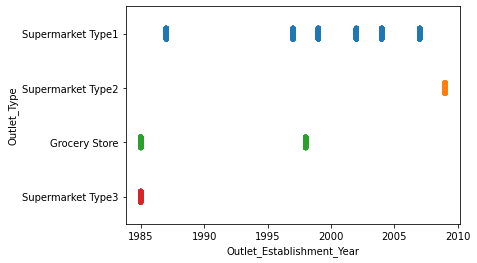

In [46]:
sns.stripplot(df_train['Outlet_Establishment_Year'],df_train['Outlet_Type'])

Supermarket type 2 was build much later while grocery stores and supermarket type 3 are the oldest outlet type.



<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

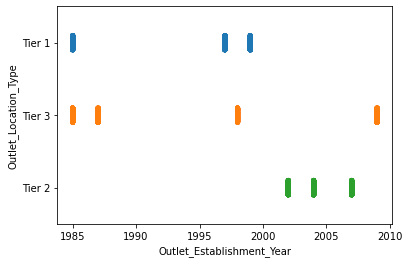

In [47]:
sns.stripplot(df_train['Outlet_Establishment_Year'],df_train['Outlet_Location_Type'])

In Tier1 and tier3 cities outlets were established in 1985 whereas tier2 got outlets after 2000.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Size'>

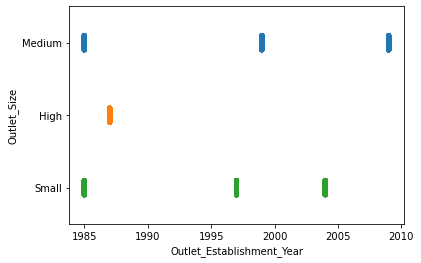

In [48]:
sns.stripplot(df_train['Outlet_Establishment_Year'],df_train['Outlet_Size'])

After 1990 ,no outlet size of high area was established.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

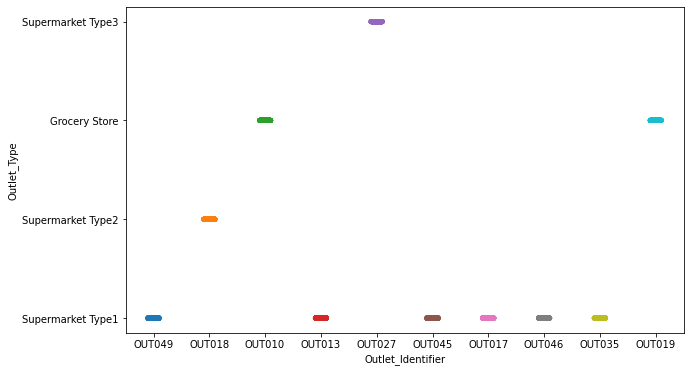

In [49]:
plt.figure(figsize=(10,6))
sns.stripplot(df_train['Outlet_Identifier'],df_train['Outlet_Type'])

There is only one oulet identifier for supermarket type 2 and type 3 while most of the outlet identifiers belong to supermarket type 1

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Location_Type'>

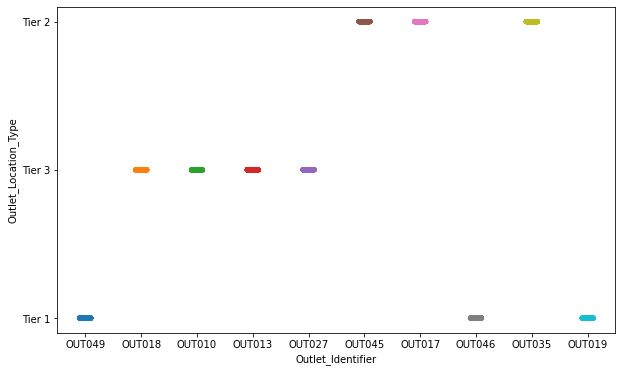

In [50]:
plt.figure(figsize=(10,6))
sns.stripplot(df_train['Outlet_Identifier'],df_train['Outlet_Location_Type'])

Tier 3 has the most diff types of outlets 

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Identifier'>

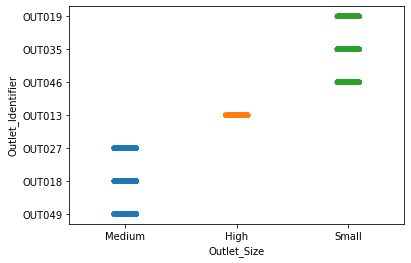

In [51]:
sns.stripplot(df_train['Outlet_Size'],df_train['Outlet_Identifier'])

only one outlet13 has a high size area where medium have 3 outlet identifiers and small have 3 outlet identifier

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

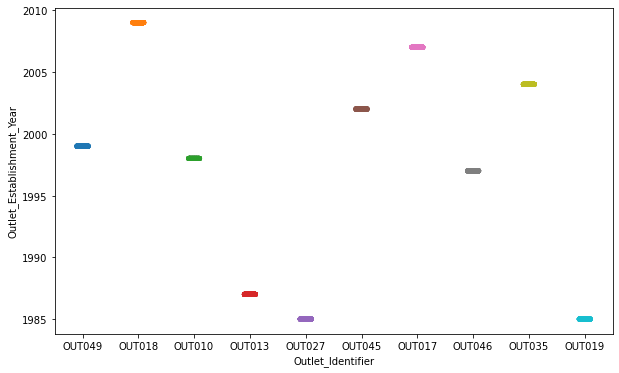

In [52]:
plt.figure(figsize=(10,6))
sns.stripplot(df_train['Outlet_Identifier'],df_train['Outlet_Establishment_Year'])

Outlet 27 and 19 are the oldest outlet identifier and outlet 18 is the newest

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

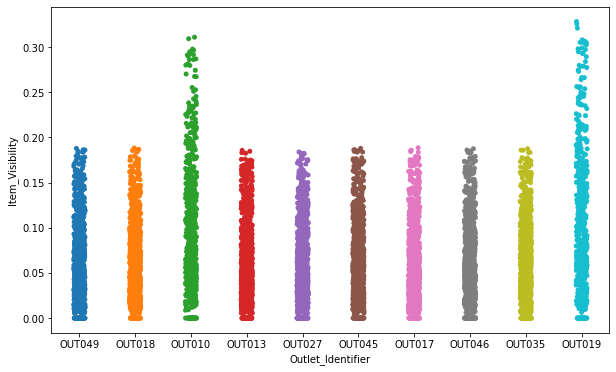

In [53]:
plt.figure(figsize=(10,6))
sns.stripplot(df_train['Outlet_Identifier'],df_train['Item_Visibility'])

Outlet 10 and 19 have give the highest visibilty to products. Other outlets provide almost equal visibility.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

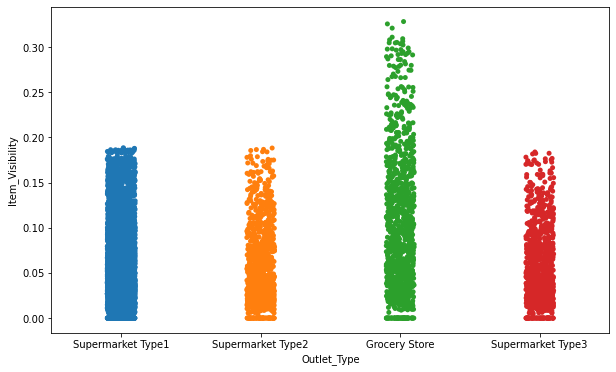

In [54]:
plt.figure(figsize=(10,6))
sns.stripplot(df_train['Outlet_Type'],df_train['Item_Visibility'])

Products are most visible in grocery stores rather than any other super markets

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

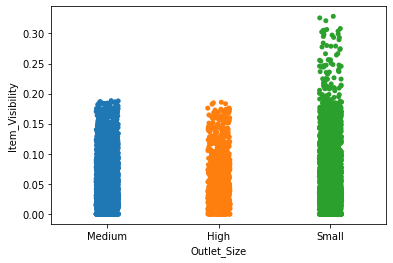

In [55]:
sns.stripplot(df_train['Outlet_Size'],df_train['Item_Visibility'])

Smallest Stores provide the most visibility to products

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

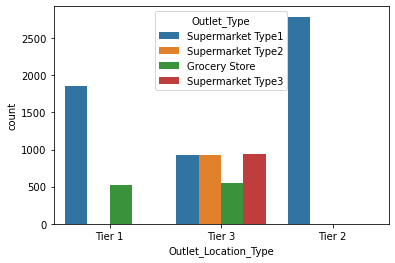

In [56]:
sns.countplot(df_train['Outlet_Location_Type'],hue=df_train['Outlet_Type'])

Tier 2 cities have the highest no. of supermarket type 1 and donot have any other type of outlet
whereas tier 3 cities have all the types of outlets with less no. of each of them.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

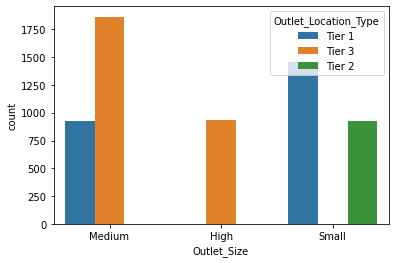

In [57]:
sns.countplot(df_train['Outlet_Size'],hue=df_train['Outlet_Location_Type'])

Tier 3 cities have the highest no. of medioum size outlet and
tier 1 cities have highest no. small size outlets.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

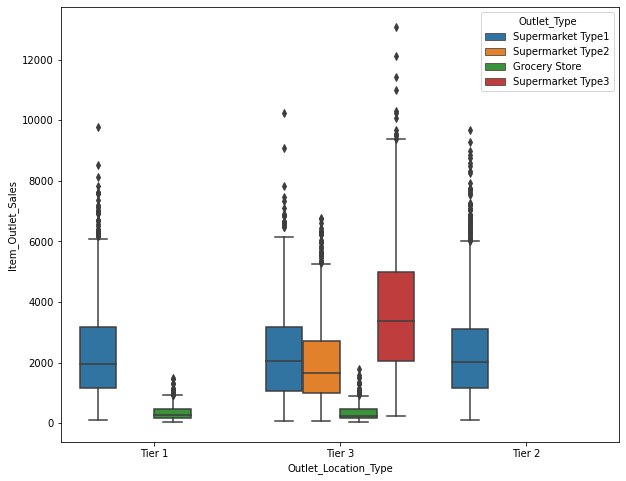

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df_train)

Tier 3 locations have the most sales. It can also be seen that they have most type of outlets, hence more sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

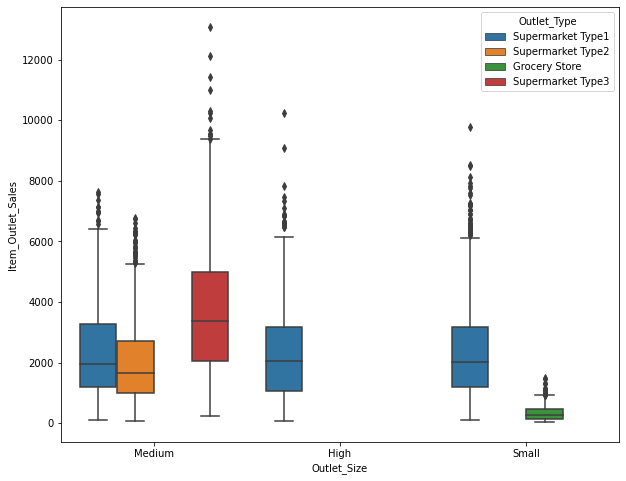

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Size','Item_Outlet_Sales',hue='Outlet_Type',data=df_train)

It can be seen that medium size outlets sell the most and also they have the most type of ooutlets hence the sales increases even more

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

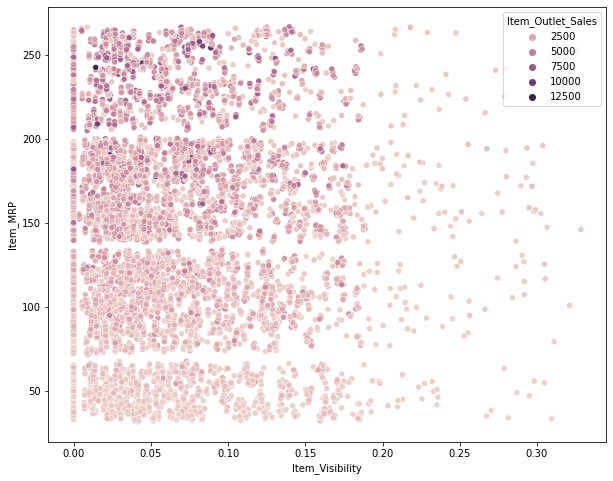

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot('Item_Visibility','Item_MRP',hue='Item_Outlet_Sales',data=df_train)

Item_Outlet_Sales increases with low item visibility and high item price.

Observation :
There is not much relation between fat content and item outlet sales. 

Seafoord, Vegetables and fruits contribute towards the item outlet sales. 

Medium size outlets and Supermarket 3 gives the most item outlet sales.

Tier 1 cities donot produce least` item outlet sales compared to other types of cities.

<AxesSubplot:>

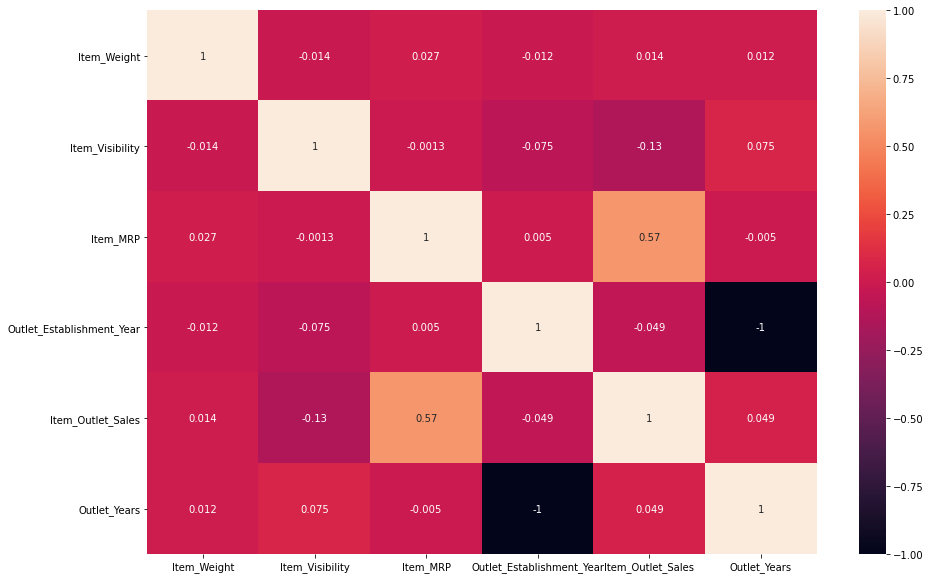

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)

MRP has the strongest positive correlation with Sales, while visibility and establishment show a little negative correlation.
There is not much correlation between the independent features.

Item_Weight                     AxesSubplot(0.125,0.125;0.110714x0.755)
Item_Visibility              AxesSubplot(0.257857,0.125;0.110714x0.755)
Item_MRP                     AxesSubplot(0.390714,0.125;0.110714x0.755)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.125;0.110714x0.755)
Item_Outlet_Sales            AxesSubplot(0.656429,0.125;0.110714x0.755)
Outlet_Years                 AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

<Figure size 2160x0 with 0 Axes>

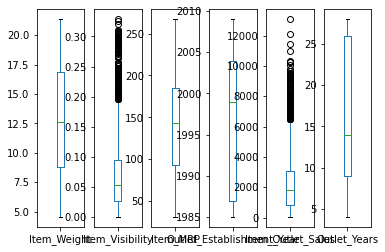

In [62]:
plt.figure(figsize=(30,0))
df_train.plot(kind ='box',subplots = True,sharex = False)

We can see that item_visibilty has most of the outliers and also target variable has outliers but we leave outliers for target variable and be as it is.

## EDA for test data test

In [63]:
df_test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

we will impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.

In [64]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Observation:
1.Item_weight has minimun weight of 4.5 and maximun weight of 21.35

2.Item_visibility has minimum value of 0 which cant be possisble.

3.Item_mrp :The minimum price of the product is 31 and maximun price is 266.

4.The year of establishment outlet vary from 1985 to 2009.

5.The lower ‘count’ of Item_Weight confirms there is a missing value .

# check the value counts for all the columns

In [65]:
#for imputation purpose ,lets first check in outlet_size and item_weight
print("Outlet_Size:\n", df_test.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", df_test.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64 


Item_Weight:
 10.50    57
17.60    53
15.60    48
20.25    47
19.35    46
         ..
5.32      1
7.00      1
8.38      1
7.67      1
6.96      1
Name: Item_Weight, Length: 410, dtype: int64 




Outlet_Size is a categorical column, therefore we see frequency of medium is more with respect to others so 
we will impute it with most_frequent strategy which will take "medium" inputs for imputation. 

In [66]:
#converting the outlet_establishment_year into outlet_years
#Years:As the big mart sales have collected 2013 sales data so used 2013 here
df_test['Outlet_Years'] = 2013 - df_test['Outlet_Establishment_Year']
df_test['Outlet_Years'].describe()

count    5681.000000
mean       15.171097
std         8.372256
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

This shows outlets are 4-28 years old.

# Splitting data into categorical column and numerical column

In [67]:
#list of all the non_object(numeric) columns
non_obj = df_test.select_dtypes('number').columns.to_list()
#list of all the object(categoric) columns
obj = df_test.select_dtypes('object').columns.to_list()

#numeric df
BM_nonobj =  df_test[non_obj]
#categoric df
BM_obj = df_test[obj]

In [68]:
non_obj #we can see numerical columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Years']

In [69]:
obj #categorical columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [70]:
[df_test[category].value_counts() for category in obj[1:]]

[Low Fat    3396
 Regular    1935
 LF          206
 reg          78
 low fat      66
 Name: Item_Fat_Content, dtype: int64,
 Snack Foods              789
 Fruits and Vegetables    781
 Household                638
 Frozen Foods             570
 Dairy                    454
 Baking Goods             438
 Canned                   435
 Health and Hygiene       338
 Meat                     311
 Soft Drinks              281
 Breads                   165
 Hard Drinks              148
 Starchy Foods            121
 Others                   111
 Breakfast                 76
 Seafood                   25
 Name: Item_Type, dtype: int64,
 OUT027    624
 OUT013    621
 OUT046    620
 OUT035    620
 OUT049    620
 OUT045    619
 OUT018    618
 OUT017    617
 OUT010    370
 OUT019    352
 Name: Outlet_Identifier, dtype: int64,
 Medium    1862
 Small     1592
 High       621
 Name: Outlet_Size, dtype: int64,
 Tier 3    2233
 Tier 2    1856
 Tier 1    1592
 Name: Outlet_Location_Type, dtype: int64,
 

1.for low fat values has been repeating so we can put them in one category as low fat using replace method

2.Fruits and vegetables were found in more quantity in outlets.

3.The items types are either food,drink,non consumable .

In [71]:
df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [72]:
#checkinf result
df_test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [73]:
df_test["Item_Identifier"].value_counts() # we see Item_types are associated with IDs like FD-Food item,NC-Non-consumable,DR-Drink

NCS41    8
FDQ60    8
FDN52    8
FDK57    8
FDZ50    8
        ..
NCF42    1
FDF05    1
FDG38    1
NCB31    1
FDP28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [74]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,6
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


# Univariate Analysis for categorical columns

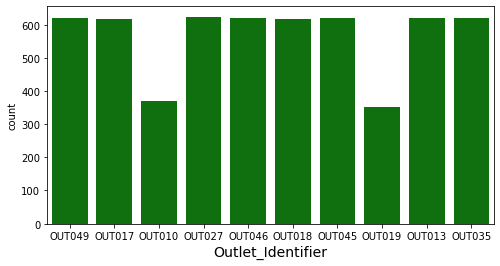

In [75]:
#for categoria
plt.figure(figsize=(8,4))
sns.countplot(x='Outlet_Identifier' , data=df_test,color='g')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

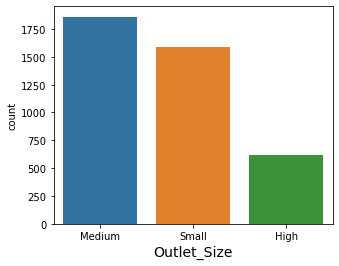

In [76]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Size' , data=df_test )
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

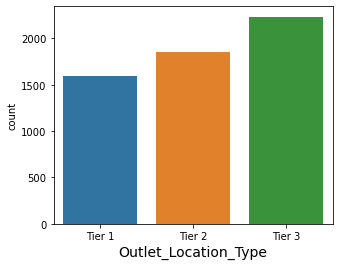

In [77]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Location_Type' , data=df_test )
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

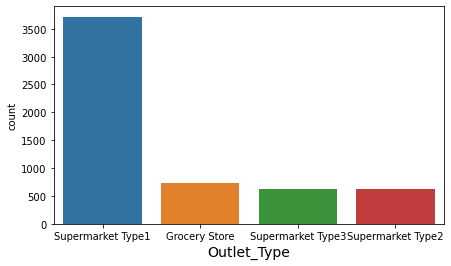

In [78]:
plt.figure(figsize=(7,4))
sns.countplot(x='Outlet_Type' , data=df_test )
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

 Categoric columns Observation:
1.Item_Fat_Content - Low fat products are mostly sold. 

2.Item_Type- Fruits and vegetables and snack foods are mostly popular and sold mostly.

3.Outlet_Identifier-Footl falls are evenly among outlets excluding OUT010 and OUT019 that are low due to lower foot falls.

4.Outlet_Size - Most of the outlets are medium sized.

5.Outlet_Location_Type-The most common type is Tier3 due to maximum foot fall.

6.Outlet_Type - The most popular outlet type is Supermarket Type1 as the sales margin is good. .

# Numerical Column Analysis

In [79]:
non_obj = df_test.select_dtypes('number').columns.to_list()

In [80]:
non_obj

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Years']

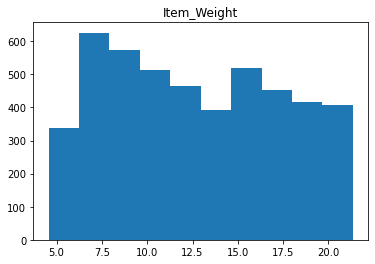

In [81]:
plt.hist(df_test['Item_Weight'])
plt.title("Item_Weight")
plt.show()   #somewhat normal distribution

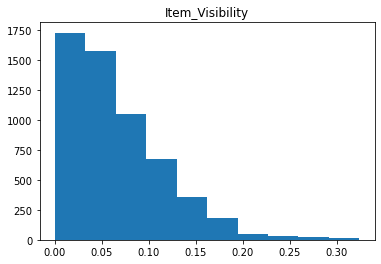

In [82]:
plt.hist(df_test['Item_Visibility'])
plt.title("Item_Visibility")
plt.show() #right skewed 

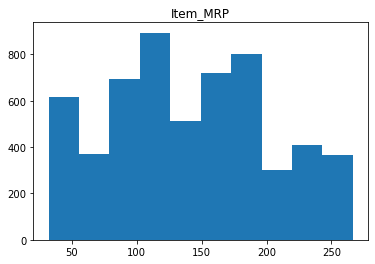

In [83]:
plt.hist(df_test['Item_MRP'])
plt.title("Item_MRP")
plt.show()

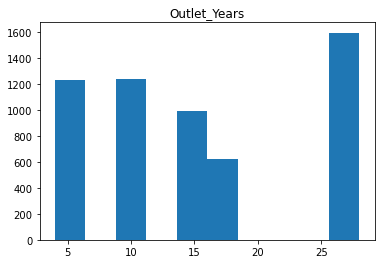

In [84]:
plt.hist(df_test['Outlet_Years'])
plt.title("Outlet_Years")
plt.show()

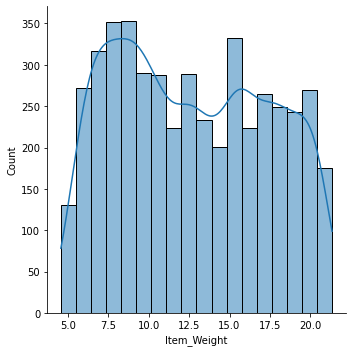

In [85]:
sns.displot(BM_nonobj['Item_Weight'],kde=True) #normal distribution

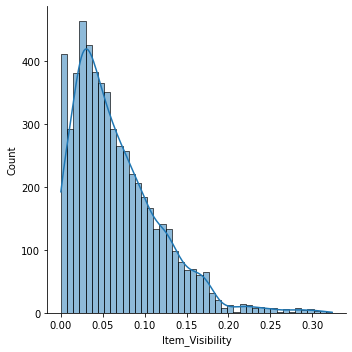

In [86]:
sns.displot(BM_nonobj['Item_Visibility'],kde=True) #right skewed

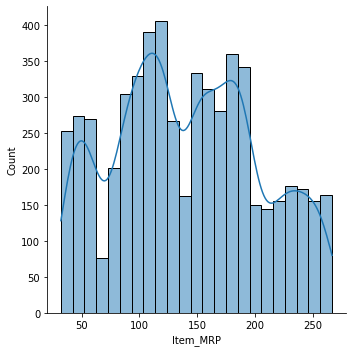

In [87]:
sns.displot(BM_nonobj['Item_MRP'],kde=True)

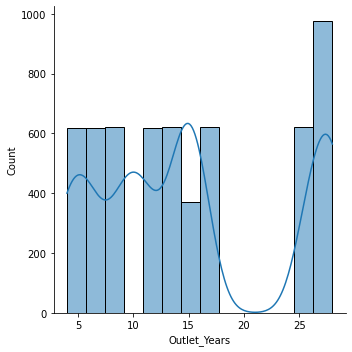

In [88]:
sns.displot(BM_nonobj['Outlet_Years'],kde=True)

Observation:
Outlet_Years - no specific pattern,no normal distribution.

Item_Weight - The data is very spreaded, no specific pattern,distribution is not normal

Item_Visibility - The data is spreaded ,right skewed ,distribution is not normal,item outlet sales sharply decreases for the most visible items

Item_MRP - Items with higher MRP are selling better in most cases.   
    

# Bivariate Plot/Multivariate plot 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

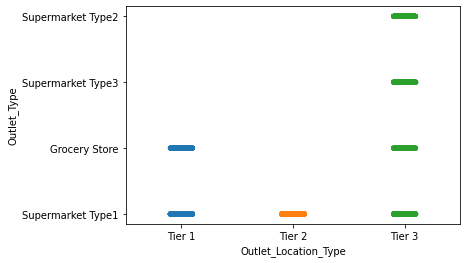

In [89]:
sns.stripplot(df_test['Outlet_Location_Type'],df_test['Outlet_Type'])

Tier 2 cities have only Superkarket type 1 whereas Tier 1 cities have only supermarket 1 
and grocery strores and Tier 3 has all the outlet_types.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

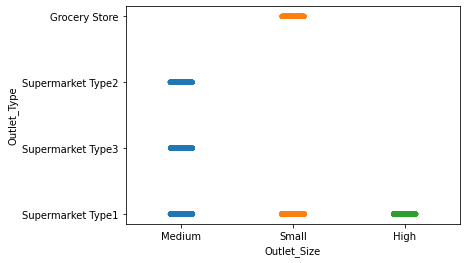

In [90]:
sns.stripplot(df_test['Outlet_Size'],df_test['Outlet_Type'])

Supermarket type 1 are of all sizes whereas grocery stores are only small
and Supermarket type 2 and supermarket type 3 are of medium size only.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

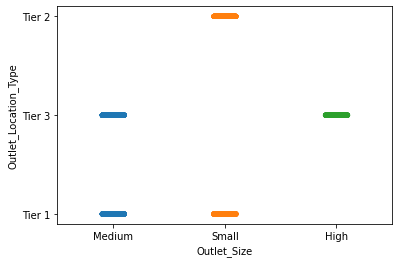

In [91]:
sns.stripplot(df_test['Outlet_Size'],df_test['Outlet_Location_Type'])

Tier 2 citis have only small outlet size and high outlet size is only found in tier 3 cities

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

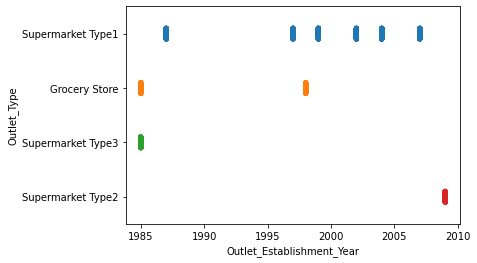

In [92]:
sns.stripplot(df_test['Outlet_Establishment_Year'],df_test['Outlet_Type'])

Supermarket type 2 was build much later while grocery stores and supermarket type 3 are the oldest outlet type.



<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

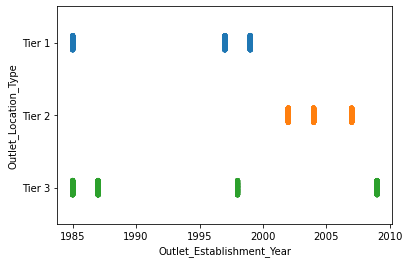

In [93]:
sns.stripplot(df_test['Outlet_Establishment_Year'],df_test['Outlet_Location_Type'])

In Tier1 and tier3 cities outlets were established in 1985 whereas tier2 got outlets after 2000

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Size'>

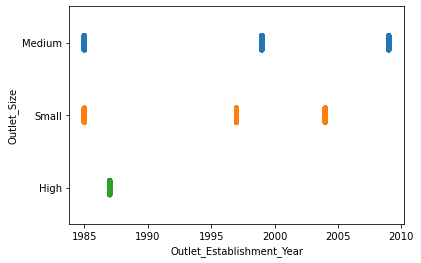

In [94]:
sns.stripplot(df_test['Outlet_Establishment_Year'],df_test['Outlet_Size'])

After 1990 ,no outlet size of high area was established.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

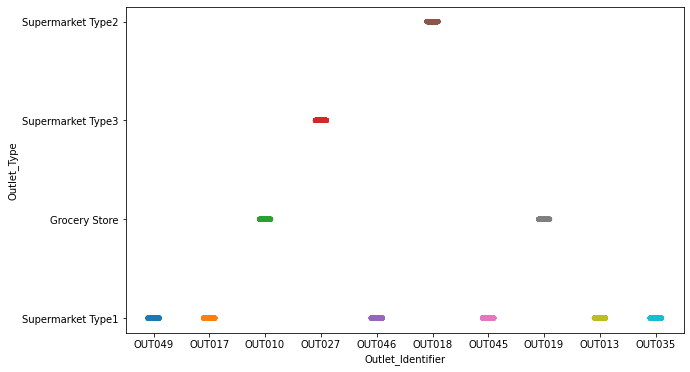

In [95]:
plt.figure(figsize=(10,6))
sns.stripplot(df_test['Outlet_Identifier'],df_test['Outlet_Type'])

There is only one oulet identifier for supermarket 2 and 3 while most of the outlet identifiers belong to supermarket1

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Location_Type'>

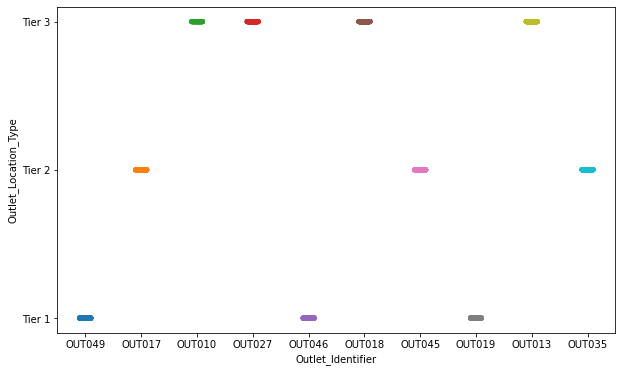

In [96]:
plt.figure(figsize=(10,6))
sns.stripplot(df_test['Outlet_Identifier'],df_test['Outlet_Location_Type'])

Tier 3 has the most diff types of outlets 

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Identifier'>

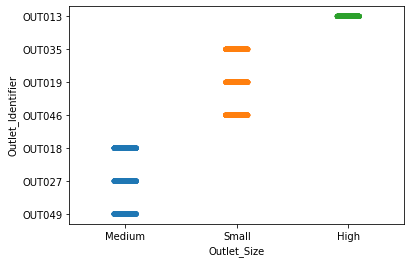

In [97]:
sns.stripplot(df_test['Outlet_Size'],df_test['Outlet_Identifier'])

only one outlet13 has a high size area where medium have 3 outlet identifiers and small have 3 outlet identifier

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

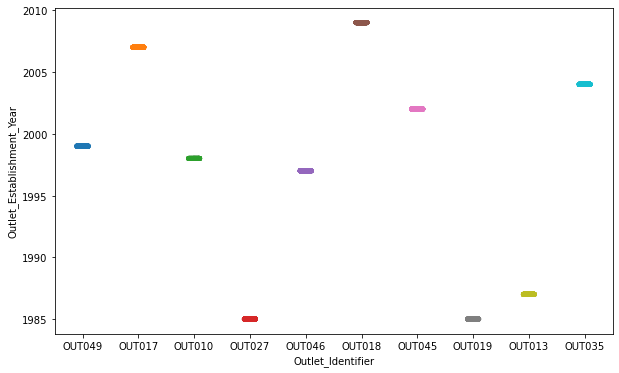

In [98]:
plt.figure(figsize=(10,6))
sns.stripplot(df_test['Outlet_Identifier'],df_test['Outlet_Establishment_Year'])

Outlet 27 and 19 are the oldest outlet identifier and outlet 18 is the newest

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

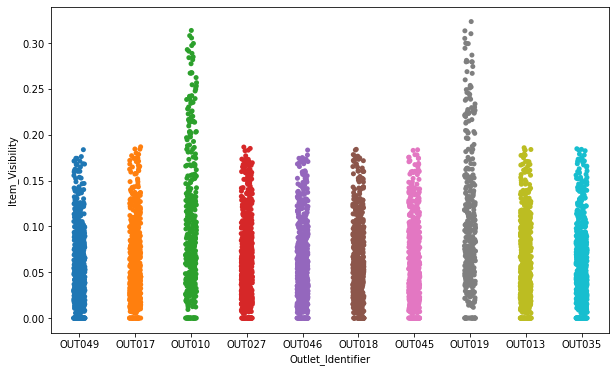

In [99]:
plt.figure(figsize=(10,6))
sns.stripplot(df_test['Outlet_Identifier'],df_test['Item_Visibility'])

Outlet 10 and 19 have give the highest visibilty to products. Other outlets provide almost equal visibility.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

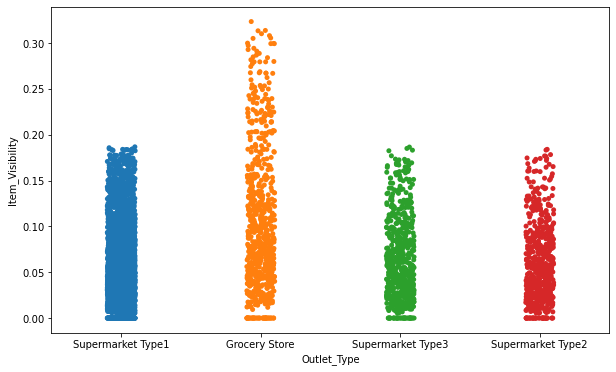

In [100]:
plt.figure(figsize=(10,6))
sns.stripplot(df_test['Outlet_Type'],df_test['Item_Visibility'])

Products are most visible in grocery stores rather than any other super markets

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

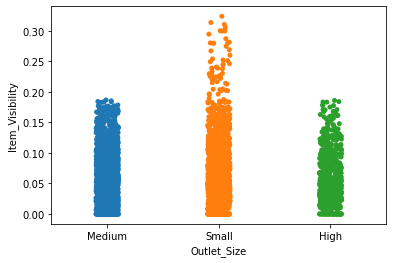

In [101]:
sns.stripplot(df_test['Outlet_Size'],df_test['Item_Visibility'])

Smallest Stores provide the most visibility to products

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

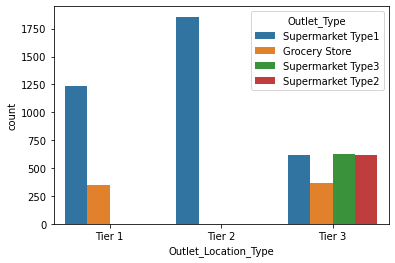

In [102]:
sns.countplot(df_test['Outlet_Location_Type'],hue=df_test['Outlet_Type'])

Tier 2 cities have the highest no. of supermarket type1 and donot have any other type of outlet
whereas tier 3 cities have all the types of outlets with less no. of each of them.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

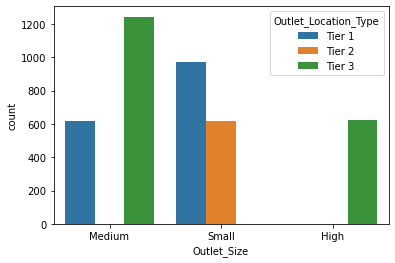

In [103]:
sns.countplot(df_test['Outlet_Size'],hue=df_test['Outlet_Location_Type'])

Tier 3 cities have the highest no. of medioum size outlet and
tier 1 cities have highest no. small size outlets.Tier 2 cities have the least no. of stores

<AxesSubplot:>

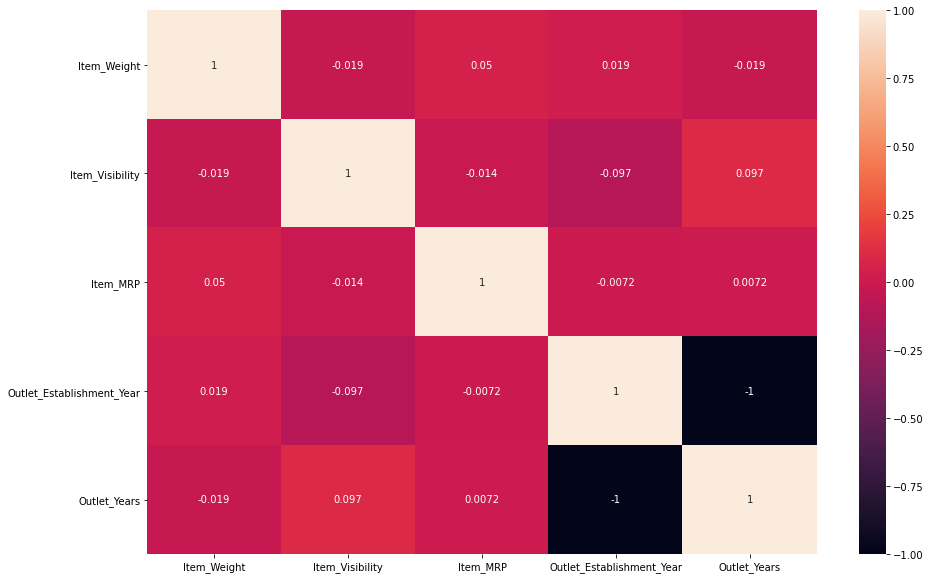

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(df_test.corr(),annot=True)

MRP has the strongest positive correlation with Sales, while visibility and establishment show a negative correlation.
There is not much correlation between the independent features.

We can see that item_visibilty has most of the outliers .

Item_Weight                     AxesSubplot(0.125,0.125;0.133621x0.755)
Item_Visibility              AxesSubplot(0.285345,0.125;0.133621x0.755)
Item_MRP                      AxesSubplot(0.44569,0.125;0.133621x0.755)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.125;0.133621x0.755)
Outlet_Years                 AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

<Figure size 2160x0 with 0 Axes>

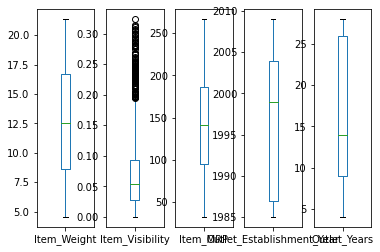

In [105]:
plt.figure(figsize=(30,0))
df_test.plot(kind ='box',subplots = True,sharex = False)

## HANDLING MISSING VALUES FOR TRAINING SET

In [106]:
#item_weight
df_train["Item_Weight"].mean()
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)
#Replacing the Nan values with this mean

In [107]:
#Outlet_size
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [108]:
df_train["Outlet_Size"].fillna('Medium',inplace=True)

In [109]:
df_train.isnull().sum() #no null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

#Item_visibility

The item_visibility has minimum value of 0 from our descriptive statistics,as all the items needs to be visible
to the customers,it cant be 0 visibility.We need to treat it as missing value.

In [110]:
df_train[df_train["Item_Visibility"]==0]['Item_Visibility'].count()


526

In [111]:
df_train['Item_Visibility']=df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())

In [112]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

In [165]:
df_train.shape

(8424, 13)

# Encoding object type features

In [113]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in df_train.columns:
    if df_train[i].dtypes== "object":
        df_train[i]= enc.fit_transform(df_train[i].values.reshape(-1,1))    

In [114]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,4
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14
3,1121,19.200,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800,15
4,1297,8.930,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,26
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,11
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,9
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,4


In [115]:
df_train.corr()["Item_Outlet_Sales"].sort_values()

Item_Visibility             -0.134138
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Weight                  0.011550
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Years                 0.049135
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

Thus we see that outlet_sales is highly positively correlated with item_mrp,outlet_type and least correlated with item_visibility,outlet_size,and year of establishment.

<AxesSubplot:>

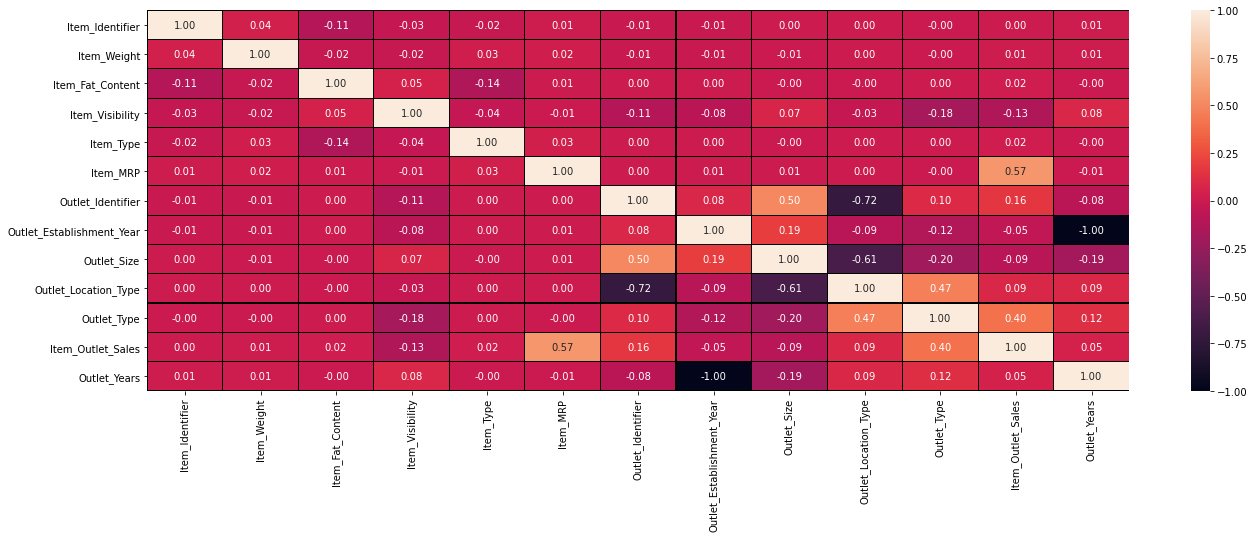

In [116]:
plt.figure(figsize=(22,7))
sns.heatmap(df_train.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

Text(0.5, 1.0, 'correlation')

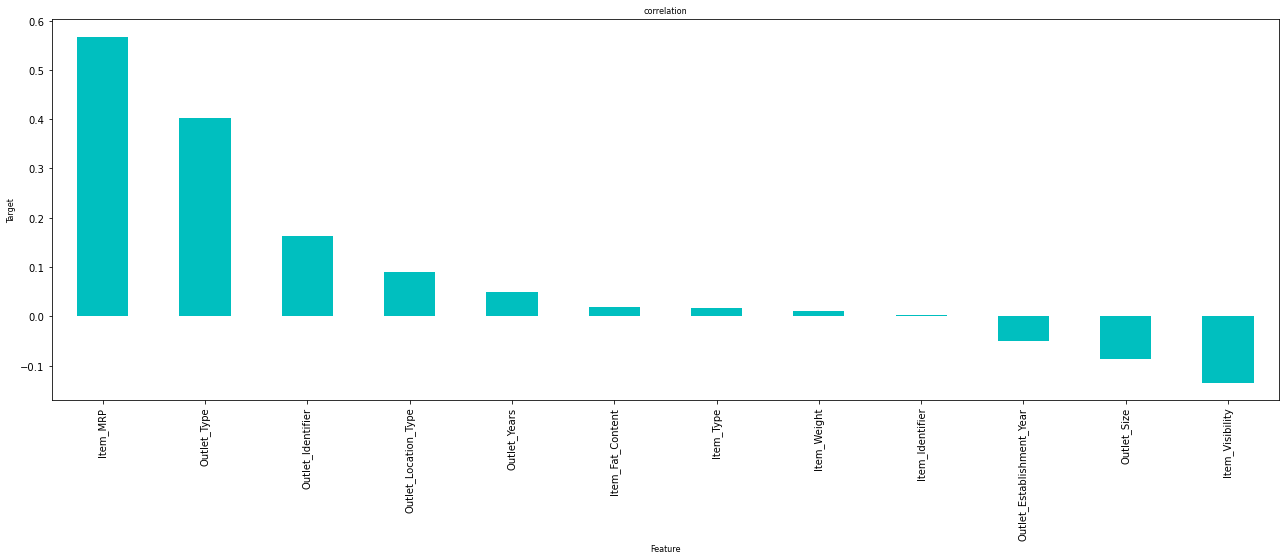

In [117]:
plt.figure(figsize=(22,7))
df_train.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(["Item_Outlet_Sales"]).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=8)
plt.ylabel("Target",fontsize=8)
plt.title('correlation',fontsize=8)        

In [118]:
df_train.skew() #in categorical column we dont check skewness,in target column ,we dont see skewness

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.286877
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
Outlet_Years                 0.396641
dtype: float64

Thus considering the range of skewness from +/-0.5, item_visibility has skewness and we need to remove it. 

In [119]:
#Removing outliers from Visibiltiy column
df_train=df_train[np.abs(df_train.Item_Visibility-df_train.Item_Visibility.mean())<=(3*df_train.Item_Visibility.std())]

In [120]:
df_train.shape

(8424, 13)

<AxesSubplot:xlabel='Item_Visibility'>

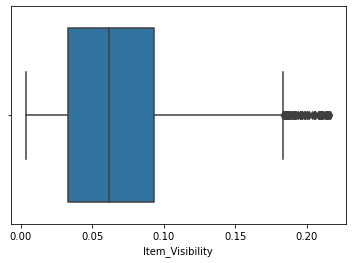

In [121]:
sns.boxplot(df_train['Item_Visibility'])

In [122]:
#Removing skewness from visibility column
df_train['Item_Visibility'].skew()

0.8663973353467513

In [123]:
df_train['Item_Visibility']=np.sqrt(df_train['Item_Visibility'])

In [125]:
df_train['Item_Visibility'].skew()

0.2264935970229984

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

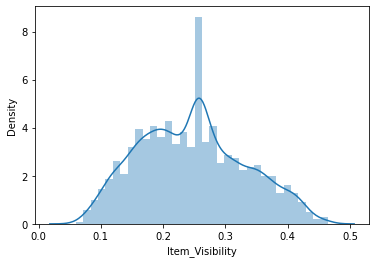

In [126]:
sns.distplot(df_train['Item_Visibility'])

## HANDLING MISSING VALUES FOR TEST SET

In [127]:
#item_weight
df_test["Item_Weight"].mean()
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace=True)
#Replacing the Nan values with this mean
#Replacing the Nan values with this mean

In [128]:
#Outlet_size
df_test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [129]:
df_test["Outlet_Size"].fillna('Medium',inplace=True)

In [130]:
df_test.isnull().sum() #no null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Years                 0
dtype: int64

#Item_visibility

The item_visibility has minimum value of 0 from our descriptive statistics,as all the items needs to be visible
to the customers,it cant be 0 visibility.We need to treat it as missing value.

In [131]:
df_test[df_test["Item_Visibility"]==0]['Item_Visibility'].count()

353

In [132]:
df_test['Item_Visibility']=df_test['Item_Visibility'].replace(0,df_test['Item_Visibility'].mean())

In [133]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Years                 0
dtype: int64

In [134]:
df_test.drop(['Outlet_Years'],axis=1,inplace=True)

## Encoding object type features for test set

In [135]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in df_test.columns:
    if df_test[i].dtypes== "object":
        df_test[i]= enc.fit_transform(df_test[i].values.reshape(-1,1))    

In [136]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,0.065684,3,214.6218,2,2007,1,1,1


<AxesSubplot:>

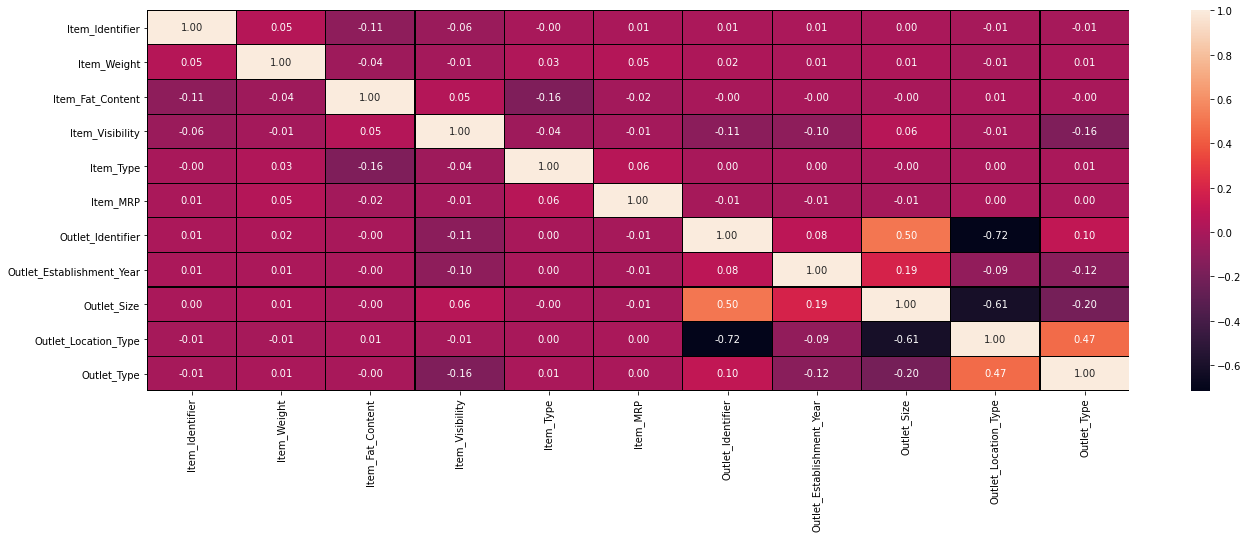

In [137]:
plt.figure(figsize=(22,7))
sns.heatmap(df_test.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

In [138]:
df_test.skew() #in categorical column we dont check skewness,

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.609223
Item_Visibility              1.372659
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

Thus considering the range of skewness from +/-0.5, item_visibility has skewness and we need to remove it. 

In [139]:
#Removing outliers from Visibiltiy column
df_test=df_test[np.abs(df_test.Item_Visibility-df_test.Item_Visibility.mean())<=(3*df_test.Item_Visibility.std())]

In [140]:
df_test.shape

(5595, 11)

<AxesSubplot:xlabel='Item_Visibility'>

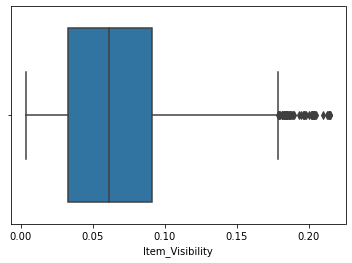

In [141]:
sns.boxplot(df_test['Item_Visibility'])

In [142]:
#Removing skewness from visibility column
df_test['Item_Visibility'].skew()

0.8580370531941571

In [143]:
df_test['Item_Visibility']=np.sqrt(df_test['Item_Visibility'])

In [144]:
df_test['Item_Visibility'].skew()

0.20374208388390366

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

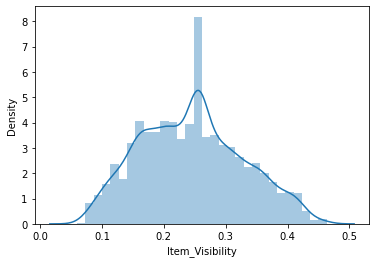

In [145]:
sns.distplot(df_test['Item_Visibility'])

## Splitting into X and Y 

In [227]:
x=df_train.drop(['Item_Outlet_Sales','Outlet_Years'],axis=1)
y=df_train["Item_Outlet_Sales"]

In [228]:
x.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Scaling data

In [229]:
len(x.columns)

11

In [230]:
len(non_obj)

4

In [231]:
len(obj)

7

In [232]:
non_obj.remove('Outlet_Years')
x[obj].shape

(8424, 7)

In [233]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled= pd.DataFrame(ss.fit_transform(x[non_obj]), columns = non_obj)

In [251]:
x = pd.concat([x_scaled.reset_index(), df_train[obj].reset_index()], axis = 1)

In [259]:
x.drop(['index'], axis =1, inplace = True)

In [260]:
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [261]:
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model performs well")
        print("At Random state:",i)
        print(f"At random state,the training accuracy:-", r2_score(y_train,pred_train)*100)
        print(f"At random state,the testing accuracy:-", r2_score(y_test,pred_test)*100)   
        print("\n")

At Random State 19 The model performs well
At Random state: 19
At random state,the training accuracy:- 50.68906190825262
At random state,the testing accuracy:- 50.68152874753458


At Random State 159 The model performs well
At Random state: 159
At random state,the training accuracy:- 50.6764538204957
At random state,the testing accuracy:- 50.662143714418505




In [262]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33,random_state=159)
#random state at 171 taken as training and testing accuracy are same

In [263]:
#training the model
lr.fit(x_train,y_train)

LinearRegression()

In [264]:
pred_test=lr.predict(x_test)

In [265]:
print(r2_score(y_test,pred_test)*100)

50.662143714418505


# cross_validation of the model

In [266]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold :",j)
    print("The CV score is :",cv_mean)
    print("The accuracy score for training :",Train_accuracy)
    print("The accuracy score for testing :",Test_accuracy)
    print("\n")

At cross fold : 2
The CV score is : 0.5046915362650432
The accuracy score for training : -0.5054528936661717
The accuracy score for testing : 0.5066214371441851


At cross fold : 3
The CV score is : 0.5051068670584589
The accuracy score for training : -0.5054528936661717
The accuracy score for testing : 0.5066214371441851


At cross fold : 4
The CV score is : 0.503350552096915
The accuracy score for training : -0.5054528936661717
The accuracy score for testing : 0.5066214371441851


At cross fold : 5
The CV score is : 0.5045925635298047
The accuracy score for training : -0.5054528936661717
The accuracy score for testing : 0.5066214371441851


At cross fold : 6
The CV score is : 0.5045422888288447
The accuracy score for training : -0.5054528936661717
The accuracy score for testing : 0.5066214371441851


At cross fold : 7
The CV score is : 0.505179152762459
The accuracy score for training : -0.5054528936661717
The accuracy score for testing : 0.5066214371441851


At cross fold : 8
The CV

We see there is almost equal accuracy among cross validayion,traing and testing data, so number of cv folds dont have much impact on accuracy, so we can take cv=5

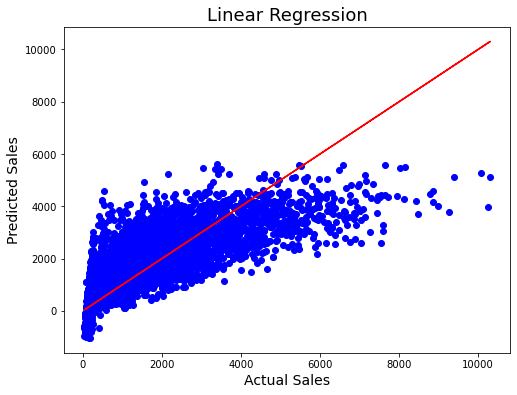

In [267]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Sales",fontsize=14)
plt.ylabel("Predicted Sales",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints ,we can improve more by regularization and 
hyperparameter technique. There are some datapoint far away from best fit line,which can incresae the mse error 
so we need to regularise and improve the r2_score

# REGULARIZATION

In [268]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters ={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [270]:
#final model training
ls=Lasso(alpha= 0.1, random_state= 0)
ls.fit(x_train,y_train)   
ls_score_training=ls.score(x_train,y_train) 
pred_ls=ls.predict(x_test) 
ls_score_training*100       

50.676442204965056

Training score is 50.67

In [271]:
lss=r2_score(y_test,pred_ls)
lss*100

50.661923378399784

The score is 50.66

In [290]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

50.45954291933042

The CV_mean score is  50.45

# Model 1:Random Forest Regressor

In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mae'],# Ihv considered this as parameters[''mse','mae'],
            'max_features':['sqrt'],
           }      # i have consideerd this as parameters ["auto",'sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'mae', 'max_features': 'sqrt'}


In [277]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 58.07050424277509
Cross Val Score: 56.77842720008041


R2 Score 58.07
Cross Val Score: 56.77

# Model2:Decision Tree Regressor

In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters={'splitter':['random'],# considered this ["best","random"],
           'min_samples_leaf':[8],# considered this   [1,2,3,4,5,6,7,8,9,10],
            "max_depth" : [7],# considered this [1,3,5,7,9,11,12],
            "max_features":['auto'],# considered this auto","log2","sqrt",None],
           }
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
# showed output as {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'splitter': 'random'}

{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'splitter': 'random'}


In [279]:
dtr=DecisionTreeRegressor(max_depth= 7, max_features= 'auto',min_samples_leaf= 8, splitter= 'random')
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score',dts*100)

dtscore=cross_val_score(dtr,x,y,cv=5)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

R2 Score 58.14681847275898
Cross Val Score: 57.91118414685016


R2 Score 58.14

Cross Val Score: 57.91

# Model 3:AdaBoost Regressor

In [280]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

parameters={'n_estimators':[10], #[2,5,10,20],
           'learning_rate':[1], #[0.1,0.01,0.001,1]
           'random_state':[3],#[3]
           'loss':['exponential'], #['linear','square','exponential']
           }

ada=AdaBoostRegressor()
clf=GridSearchCV(ada,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
#output as{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 3}

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 3}


In [281]:
ada=AdaBoostRegressor(learning_rate= 1, loss= 'exponential',n_estimators= 10, random_state= 3)
ada.fit(x_train,y_train)
ada.score(x_train,y_train)
pred_decision=ada.predict(x_test)

ads=r2_score(y_test,pred_decision)
print('R2 Score',ads*100)

adscore=cross_val_score(ada,x,y,cv=5)
adc=adscore.mean()
print('Cross Val Score:',adc*100)

R2 Score 56.48345645883581
Cross Val Score: 54.43117342514985


R2 Score 56.48

Cross Val Score: 54.43

# Model 4:GradientBoosting Regressor
    

In [282]:
from sklearn.ensemble import GradientBoostingRegressor
parameters= { 'loss':['squared_error'], #['squared_error','absolute_error'],
              'learning_rate':[0.1], #[0.1,0.01], 
              'n_estimators':[20],   #[2,5,10,20],
               'criterion':['mse'],  #['mae','mse'],      
            }

gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
#{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}


In [283]:
gbr=GradientBoostingRegressor(learning_rate= 0.1, loss= 'squared_error',n_estimators= 20, criterion= 'mse')
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_decision=gbr.predict(x_test)

gbs=r2_score(y_test,pred_decision)
print('R2 Score',gbs*100)

gbscore=cross_val_score(gbr,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

R2 Score 57.30613447318811
Cross Val Score: 57.15704312766486


R2 Score 57.30
Cross Val Score: 57.15

In [284]:
# Support Vector Regression
from sklearn.svm import SVR
parameters={ 'kernel' :['linear'], #["linear", "rbf"],
              'gamma' :['scale'], #["scale", "auto"],
              'C' : [4.0], #[2.0, 4.0],
              'epsilon' :[0.2],  #[0.2, 0.4]      
            }

svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
#{'C': 4.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}

{'C': 4.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}


In [285]:
svr=SVR(C=4.0, epsilon= 0.2, gamma='scale', kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_decision=svr.predict(x_test)

svs=r2_score(y_test,pred_decision)
print('R2 Score',svs*100)

svscore=cross_val_score(svr,x,y,cv=5)
svc=svscore.mean()
print('Cross Val Score:',svc*100)

R2 Score 48.36789883432617
Cross Val Score: 48.566262928400214


R2 Score 48.36

Cross Val Score: 48.56

Thus comparing all above model, we find that Gradient Boosting regressor after hyperparametr suits well as the r2_score accuracy and cross validation score is same around 57% .This shows our model is performing well. 
thus this model is able to predict well total sales generated from products sold in the different outlets 
of different cities.

# FEATURE_IMPORTANCE

In [291]:
coef = pd.DataFrame(index = x.columns, data = np.round(gbr.feature_importances_,2), columns = {'Importance'})
coef.sort_values(ascending=True, inplace = True, by = 'Importance')

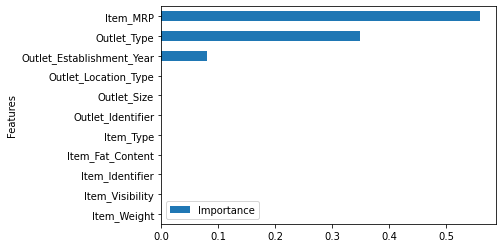

In [292]:
coef.plot.barh()
 
plt.ylabel("Features")
#plt.title("")
plt.show()

Thus we see that Item_MRP(the most imporant features) ,Outlet_type and outlet_Establishment_Year are the most important features for predicting sales. 

# Saving the model :Randon Forest Regressor :Best Model

In [170]:
import pickle
filename='bigmartsales.pkl'
pickle.dump(gbr,open(filename,'wb'))

# Conclusion :Prediction Test

In [171]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.086976,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.196030,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.315555,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.124050,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.344383,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.116174,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.378141,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.271162,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,0.256289,3,214.6218,2,2007,1,1,1


In [172]:
loaded_model=pickle.load(open('bigmartsales.pkl','rb'))

In [173]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler
df_test=ss().fit_transform(df_test)

# Prediction Results


In [174]:
conclusion=pd.DataFrame([loaded_model.predict(df_test)]).T
conclusion

,0
0,1702.426281
1,1505.998034
2,821.125963
3,2409.216723
4,5123.157791
...,...
5590,2226.192298
5591,2694.825486
5592,1855.520331
5593,3335.757526


# Converting the sales output back in CSV format

In [175]:
conclusion.to_csv("Predicted_Sales_Data.csv", index=False)